<a href="https://colab.research.google.com/github/AhmedReda3/Big-Data/blob/main/CreditBasedGrades.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [257]:
import pandas as pd
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
import seaborn as sns

In [258]:
Course_Code = np.arange(119911,119921)
Course_Code

array([119911, 119912, 119913, 119914, 119915, 119916, 119917, 119918,
       119919, 119920])

In [259]:
course_name = np.array(['Big Data', 'Distributed System', 'Data Base','Data Structure',
                        'Network', 'Control', 'Image Processing', 'Design Patterns',
                        'Software Engineering', 'Algorithms'])

In [260]:
credit_hours = random.choice([3,4], size=(10))

In [261]:
max_total = np.full(10, 100)

In [262]:
course_data = pd.DataFrame({
    "course_name" : course_name,
    "Course_Code": Course_Code,
    "credit_hours" : credit_hours,
    "max_total" : max_total,})
course_data

,course_name,Course_Code,credit_hours,max_total
0,Big Data,119911,4,100
1,Distributed System,119912,3,100
2,Data Base,119913,3,100
3,Data Structure,119914,4,100
4,Network,119915,3,100
5,Control,119916,4,100
6,Image Processing,119917,4,100
7,Design Patterns,119918,4,100
8,Software Engineering,119919,4,100
9,Algorithms,119920,4,100


In [263]:
student_name = random.choice(['Ahmed', 'Saher', 'Ali', 'Mona', 'Jon', 'Ashraf','Emad','Hazem',
                              'Reda', 'Sakr','Mohamed', 'Alaa','Omnia','Mariam','Reem', 'Kenzy',
                              'Basma'], size=(200))


In [264]:
student_code = np.arange(190100,190300)

In [265]:
student_data = pd.DataFrame({
    "student_name" : student_name,
    "student_code" : student_code})
student_data

,student_name,student_code
0,Reem,190100
1,Sakr,190101
2,Ali,190102
3,Omnia,190103
4,Emad,190104
...,...,...
195,Ali,190295
196,Alaa,190296
197,Saher,190297
198,Mohamed,190298


In [266]:
grades = []
for s in student_code :
  for i in range(0,6):
    grades.append((s,random.choice(Course_Code)))

In [267]:
Grade_data = pd.DataFrame(grades,columns = ['Student_Code', 'Course_Code'])
Grade_data

,Student_Code,Course_Code
0,190100,119913
1,190100,119916
2,190100,119912
3,190100,119917
4,190100,119914
...,...,...
1195,190299,119918
1196,190299,119914
1197,190299,119916
1198,190299,119916


In [268]:
Grade_data['sort'] = Grade_data['Student_Code'].astype(str) + '-' + Grade_data['Course_Code'].astype(str)

In [269]:
Grade_data = Grade_data.sort_values(by=['sort'])

In [270]:
Grade_data

,Student_Code,Course_Code,sort
2,190100,119912,190100-119912
0,190100,119913,190100-119913
4,190100,119914,190100-119914
1,190100,119916,190100-119916
3,190100,119917,190100-119917
...,...,...,...
1197,190299,119916,190299-119916
1198,190299,119916,190299-119916
1199,190299,119917,190299-119917
1195,190299,119918,190299-119918


In [271]:
Grade_data.drop_duplicates(inplace=True)
Grade_data

,Student_Code,Course_Code,sort
2,190100,119912,190100-119912
0,190100,119913,190100-119913
4,190100,119914,190100-119914
1,190100,119916,190100-119916
3,190100,119917,190100-119917
...,...,...,...
1196,190299,119914,190299-119914
1197,190299,119916,190299-119916
1199,190299,119917,190299-119917
1195,190299,119918,190299-119918


In [272]:
del Grade_data['sort']

In [273]:
Grade_data = Grade_data.sort_index()
Grade_data

,Student_Code,Course_Code
0,190100,119913
1,190100,119916
2,190100,119912
3,190100,119917
4,190100,119914
...,...,...
1194,190299,119920
1195,190299,119918
1196,190299,119914
1197,190299,119916


In [274]:
total = random.normal(loc=75, scale=10, size= len(Grade_data))
Grade_data['total'] = total.astype(int)

In [275]:
for x in Grade_data.index:
	if Grade_data.loc[x, 'total'] > 100:
		Grade_data.loc[x, 'total'] = 100

In [276]:
Grade_data

,Student_Code,Course_Code,total
0,190100,119913,75
1,190100,119916,73
2,190100,119912,69
3,190100,119917,87
4,190100,119914,78
...,...,...,...
1194,190299,119920,78
1195,190299,119918,89
1196,190299,119914,86
1197,190299,119916,93


<Axes: xlabel='total', ylabel='Count'>

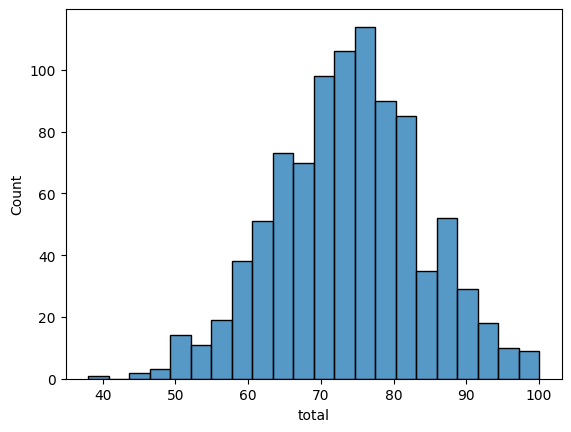

In [277]:
sns.histplot(Grade_data['total'])

In [278]:
Grade = pd.merge(Grade_data, course_data[['Course_Code', 'credit_hours']], on='Course_Code')
Grade_data

,Student_Code,Course_Code,total
0,190100,119913,75
1,190100,119916,73
2,190100,119912,69
3,190100,119917,87
4,190100,119914,78
...,...,...,...
1194,190299,119920,78
1195,190299,119918,89
1196,190299,119914,86
1197,190299,119916,93


In [279]:
Grade

,Student_Code,Course_Code,total,credit_hours
0,190100,119913,75,3
1,190101,119913,85,3
2,190102,119913,76,3
3,190107,119913,67,3
4,190108,119913,86,3
...,...,...,...,...
923,190289,119915,74,3
924,190291,119915,67,3
925,190293,119915,62,3
926,190297,119915,75,3


In [280]:
Grade['percentage'] = (Grade['total']/100)*100 
Grade

,Student_Code,Course_Code,total,credit_hours,percentage
0,190100,119913,75,3,75.0
1,190101,119913,85,3,85.0
2,190102,119913,76,3,76.0
3,190107,119913,67,3,67.0
4,190108,119913,86,3,86.0
...,...,...,...,...,...
923,190289,119915,74,3,74.0
924,190291,119915,67,3,67.0
925,190293,119915,62,3,62.0
926,190297,119915,75,3,75.0


In [281]:
Grade['grade_letter'] = pd.cut(Grade['percentage'], bins=[0, 60, 64, 67, 70, 73, 76, 80, 84, 89, 93,100],labels=['F', 'D', 'D+', 'C-', 'C', 'C+', 'B-', 'B', 'B+', 'A-', 'A'])
Grade['GPA'] = pd.cut(Grade['percentage'], bins=[0, 60, 64, 67, 70, 73, 76, 80, 84, 89, 93,100],labels=['0.0', '1.0', '1.3', '1.7', '2.0', '2.3', '2.7', '3.0', '3.3', '3.7', '4'])
Grade['GPA'] = Grade['GPA'].astype(float)
Grade

,Student_Code,Course_Code,total,credit_hours,percentage,grade_letter,GPA
0,190100,119913,75,3,75.0,C+,2.3
1,190101,119913,85,3,85.0,B+,3.3
2,190102,119913,76,3,76.0,C+,2.3
3,190107,119913,67,3,67.0,D+,1.3
4,190108,119913,86,3,86.0,B+,3.3
...,...,...,...,...,...,...,...
923,190289,119915,74,3,74.0,C+,2.3
924,190291,119915,67,3,67.0,D+,1.3
925,190293,119915,62,3,62.0,D,1.0
926,190297,119915,75,3,75.0,C+,2.3


In [282]:
student_df = Grade.query('Student_Code == 190103')
student_df

,Student_Code,Course_Code,total,credit_hours,percentage,grade_letter,GPA
277,190103,119917,75,4,75.0,C+,2.3
468,190103,119918,62,4,62.0,D,1.0
640,190103,119919,71,4,71.0,C,2.0
735,190103,119920,65,4,65.0,D+,1.3


In [283]:
Course_df = Grade.query('Course_Code == 119911')
Course_df = Course_df.sort_values(by='percentage')
Course_df

,Student_Code,Course_Code,total,credit_hours,percentage,grade_letter,GPA
572,190142,119911,38,4,38.0,F,0.0
579,190160,119911,49,4,49.0,F,0.0
600,190208,119911,51,4,51.0,F,0.0
636,190284,119911,53,4,53.0,F,0.0
612,190231,119911,53,4,53.0,F,0.0
...,...,...,...,...,...,...,...
582,190167,119911,88,4,88.0,B+,3.3
588,190184,119911,89,4,89.0,B+,3.3
601,190211,119911,92,4,92.0,A-,3.7
585,190172,119911,93,4,93.0,A-,3.7


In [284]:
Grade['weighted_GPA'] = Grade['credit_hours'] * Grade['GPA']
totalGrade = Grade.groupby('Student_Code').agg({'credit_hours': 'sum', 'weighted_GPA': 'sum'})
totalGrade['cumulative_gpa'] = totalGrade['weighted_GPA'] / totalGrade['credit_hours']
del totalGrade['weighted_GPA']
totalGrade

,credit_hours,cumulative_gpa
Student_Code,,
190100,18,2.444444
190101,15,1.540000
190102,23,2.195652
190103,16,1.650000
190104,23,2.013043
...,...,...
190295,11,1.654545
190296,16,2.925000
190297,14,2.085714


In [285]:
Courses_Statistics = Grade.groupby('Course_Code').agg({'total': ['mean', 'max', 'min']})
Courses_Statistics.columns = ['average_degree', 'max_degree', 'min_degree']
Courses_Statistics

,average_degree,max_degree,min_degree
Course_Code,,,
119911,72.717647,94,38
119912,74.042553,99,46
119913,75.494118,95,58
119914,74.420000,100,46
119915,73.800000,100,50
119916,73.000000,99,51
119917,74.022222,100,50
119918,73.136364,95,49
119919,74.375000,96,53
